ANN


In [1]:
import pandas as pd
Emp_Purchase_raw = pd.read_csv("Emp_Purchase.csv")
Emp_Purchase_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         119 non-null    float64
 1   Experience  119 non-null    float64
 2   Purchase    119 non-null    int64  
 3   Sample_Set  119 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.8 KB


In [2]:
####Filter the data and take a subset from above dataset . Filter condition is Sample_Set<3

Emp_Purchase1=Emp_Purchase_raw[Emp_Purchase_raw.Sample_Set<3]
Emp_Purchase1.shape

(74, 4)

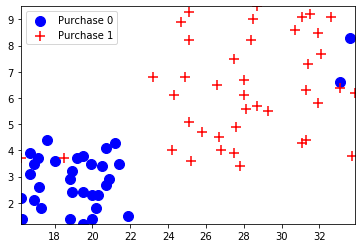

In [3]:
####The clasification graph
#Draw a scatter plot that shows Age on X axis and Experience on Y-axis. Try to distinguish the two classes with colors or shapes.
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(Emp_Purchase1.Age[Emp_Purchase1.Purchase==0],Emp_Purchase1.Experience[Emp_Purchase1.Purchase==0], s=100, c='b', marker="o", label='Purchase 0')
ax1.scatter(Emp_Purchase1.Age[Emp_Purchase1.Purchase==1],Emp_Purchase1.Experience[Emp_Purchase1.Purchase==1], s=100, c='r', marker="+", label='Purchase 1')

plt.xlim(min(Emp_Purchase1.Age), max(Emp_Purchase1.Age))
plt.ylim(min(Emp_Purchase1.Experience), max(Emp_Purchase1.Experience))
plt.legend(loc='upper left');

plt.show()

# Logistic Regression - Decision Boundary

In [4]:
import statsmodels.formula.api as sm
model1 = sm.logit(formula='Purchase ~ Age+Experience', data=Emp_Purchase1)
fitted1 = model1.fit()
print(fitted1.summary2())

#######Accuracy and error of the model1
#Create the confusion matrix
predicted_values=fitted1.predict(Emp_Purchase1[["Age"]+["Experience"]])
predicted_values[1:10]
threshold=0.5

import numpy as np
predicted_class=np.zeros(predicted_values.shape)
predicted_class[predicted_values>threshold]=1

from sklearn.metrics import confusion_matrix as cm
ConfusionMatrix = cm(Emp_Purchase1[['Purchase']],predicted_class)
print("ConfusionMatrix \n",ConfusionMatrix)
accuracy=(ConfusionMatrix[0,0]+ConfusionMatrix[1,1])/sum(sum(ConfusionMatrix))
print('Accuracy : ',accuracy)
error=1-accuracy
print('Error: ',error)

Optimization terminated successfully.
         Current function value: 0.315987
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.540     
Dependent Variable: Purchase         AIC:              52.7661   
Date:               2021-05-15 20:55 BIC:              59.6783   
No. Observations:   74               Log-Likelihood:   -23.383   
Df Model:           2                LL-Null:          -50.860   
Df Residuals:       71               LLR p-value:      1.1670e-12
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025    0.975]
------------------------------------------------------------------
Intercept    -8.9361    2.0613  -4.3351  0.0000  -12.9763  -4.8960
Age           0.2763    0.1054   2.6201  0.0088    0.0696   0.

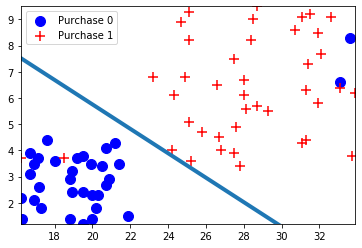

In [5]:
#coefficients
slope1=fitted1.params[1]/(-fitted1.params[2])
intercept1=fitted1.params[0]/(-fitted1.params[2])

#Finally draw the decision boundary for this logistic regression model
      
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(Emp_Purchase1.Age[Emp_Purchase1.Purchase==0],Emp_Purchase1.Experience[Emp_Purchase1.Purchase==0], s=100, c='b', marker="o", label='Purchase 0')
ax1.scatter(Emp_Purchase1.Age[Emp_Purchase1.Purchase==1],Emp_Purchase1.Experience[Emp_Purchase1.Purchase==1], s=100, c='r', marker="+", label='Purchase 1')

plt.xlim(min(Emp_Purchase1.Age), max(Emp_Purchase1.Age))
plt.ylim(min(Emp_Purchase1.Experience), max(Emp_Purchase1.Experience))
plt.legend(loc='upper left');

x_min, x_max = ax1.get_xlim()
ax1.plot([0, x_max], [intercept1, x_max*slope1+intercept1],linewidth=4)
plt.show()

# Non-Linear Decision Boundaries

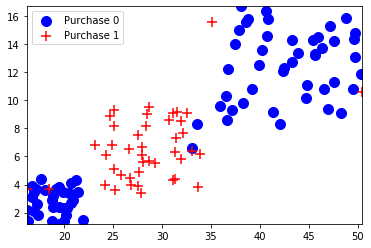

In [6]:
#plotting the overall data
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(Emp_Purchase_raw.Age[Emp_Purchase_raw.Purchase==0],Emp_Purchase_raw.Experience[Emp_Purchase_raw.Purchase==0], s=100, c='b', marker="o", label='Purchase 0')
ax.scatter(Emp_Purchase_raw.Age[Emp_Purchase_raw.Purchase==1],Emp_Purchase_raw.Experience[Emp_Purchase_raw.Purchase==1], s=100, c='r', marker="+", label='Purchase 1')

plt.xlim(min(Emp_Purchase_raw.Age), max(Emp_Purchase_raw.Age))
plt.ylim(min(Emp_Purchase_raw.Experience), max(Emp_Purchase_raw.Experience))
plt.legend(loc='upper left');
plt.show()

Optimization terminated successfully.
         Current function value: 0.632202
         Iterations 5


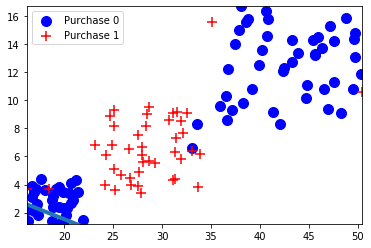

In [7]:
###Logistic Regerssion model1
import statsmodels.formula.api as sm
model = sm.logit(formula='Purchase ~ Age+Experience', data=Emp_Purchase_raw)
fitted = model.fit()
fitted.summary2()

# getting slope and intercept of the line
slope=fitted.params[1]/(-fitted.params[2])
intercept=fitted.params[0]/(-fitted.params[2])

#Finally draw the decision boundary for this logistic regression model
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(Emp_Purchase_raw.Age[Emp_Purchase_raw.Purchase==0],Emp_Purchase_raw.Experience[Emp_Purchase_raw.Purchase==0], s=100, c='b', marker="o", label='Purchase 0')
ax.scatter(Emp_Purchase_raw.Age[Emp_Purchase_raw.Purchase==1],Emp_Purchase_raw.Experience[Emp_Purchase_raw.Purchase==1], s=100, c='r', marker="+", label='Purchase 1')
plt.xlim(min(Emp_Purchase_raw.Age), max(Emp_Purchase_raw.Age))
plt.ylim(min(Emp_Purchase_raw.Experience), max(Emp_Purchase_raw.Experience))
plt.legend(loc='upper left');

x_min, x_max = ax.get_xlim()
ax.plot([0, x_max], [intercept, x_max*slope+intercept],linewidth=4)
plt.show()


# Two Intermediate Models

In [8]:
#Second model
Emp_Purchase2=Emp_Purchase_raw[Emp_Purchase_raw.Sample_Set>1]
Emp_Purchase2.shape
Emp_Purchase2.columns.values
Emp_Purchase2.head(10)



,Age,Experience,Purchase,Sample_Set
33,33.9,6.2,1,2
34,29.3,5.5,1,2
35,27.8,3.4,1,2
36,30.7,8.6,1,2
37,28.4,8.2,1,2
38,31.3,6.3,1,2
39,33.7,3.8,1,2
40,33.1,6.4,1,2
41,24.3,6.1,1,2
42,27.5,7.5,1,2


In [45]:
#frequency table of purchase variable
Emp_Purchase2.Purchase.value_counts()

0    45
1    41
Name: Purchase, dtype: int64

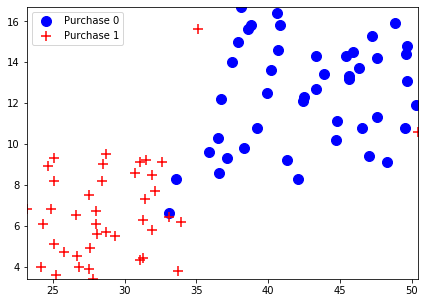

In [48]:
### The classification Graph
#Draw a scatter plot that shows Age on X-axis and Experience on Y-axis with colors and shapes

import matplotlib.pyplot as plt

fig = plt.figure()
ax2 = fig.add_subplot(111)

ax2.scatter(Emp_Purchase2.Age[Emp_Purchase2.Purchase==0],Emp_Purchase2.Experience[Emp_Purchase2.Purchase==0],
            s=100, c='b', marker="o", label='Purchase 0')
ax2.scatter(Emp_Purchase2.Age[Emp_Purchase2.Purchase==1],Emp_Purchase2.Experience[Emp_Purchase2.Purchase==1],
            s=100, c='r', marker="+", label='Purchase 1')
plt.xlim(min(Emp_Purchase2.Age), max(Emp_Purchase2.Age))
plt.ylim(min(Emp_Purchase2.Experience), max(Emp_Purchase2.Experience))
plt.legend(loc='upper left');
plt.show()



In [49]:
import statsmodels.formula.api as sm
model2 = sm.logit(formula='Purchase ~ Age+Experience', data=Emp_Purchase2)
fitted2 = model2.fit()
print(fitted2.summary2())

# getting slope and intercept of the line
# getting slope and intercept of the line
slope2=fitted2.params[1]/(-fitted2.params[2])
intercept2=fitted2.params[0]/(-fitted2.params[2])


Optimization terminated successfully.
         Current function value: 0.198139
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.714     
Dependent Variable: Purchase         AIC:              40.0799   
Date:               2021-05-16 10:13 BIC:              47.4429   
No. Observations:   86               Log-Likelihood:   -17.040   
Df Model:           2                LL-Null:          -59.518   
Df Residuals:       83               LLR p-value:      3.5660e-19
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     16.3184    3.9662   4.1144  0.0000   8.5448  24.0919
Age           -0.3994    0.1354  -2.9494  0.0032  -0.6648  -0.

## The Intermediate output and combined model

In [10]:
#The two new coloumns
Emp_Purchase_raw['inter1']=fitted1.predict(Emp_Purchase_raw[["Age"]+["Experience"]])
Emp_Purchase_raw['inter2']=fitted2.predict(Emp_Purchase_raw[["Age"]+["Experience"]])
Emp_Purchase_raw

,Age,Experience,Purchase,Sample_Set,inter1,inter2
0,20.0,2.3,0,1,0.114232,0.999578
1,16.2,2.2,0,1,0.040805,0.999910
2,20.2,1.8,0,1,0.092027,0.999595
3,18.8,1.4,0,1,0.051521,0.999790
4,18.9,3.2,0,1,0.139552,0.999661
...,...,...,...,...,...,...
114,48.8,15.9,0,3,0.999999,0.000865
115,48.3,9.1,0,3,0.999944,0.005522
116,45.4,14.3,0,3,0.999994,0.004948
117,40.8,15.8,0,3,0.999992,0.021197


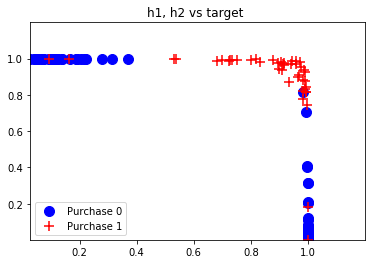

In [11]:
#plotting the new columns vs Target
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(Emp_Purchase_raw.inter1[Emp_Purchase_raw.Purchase==0],Emp_Purchase_raw.inter2[Emp_Purchase_raw.Purchase==0], s=100, c='b', marker="o", label='Purchase 0')
ax.scatter(Emp_Purchase_raw.inter1[Emp_Purchase_raw.Purchase==1],Emp_Purchase_raw.inter2[Emp_Purchase_raw.Purchase==1], s=100, c='r', marker="+", label='Purchase 1')

plt.xlim(min(Emp_Purchase_raw.inter1), max(Emp_Purchase_raw.inter1)+0.2)
plt.ylim(min(Emp_Purchase_raw.inter2), max(Emp_Purchase_raw.inter2)+0.2)

plt.legend(loc='lower left')
plt.title('h1, h2 vs target ')
plt.show()

## Final Logistic Regerssion model with Intermediate outputs as input

Optimization terminated successfully.
         Current function value: 0.208985
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27


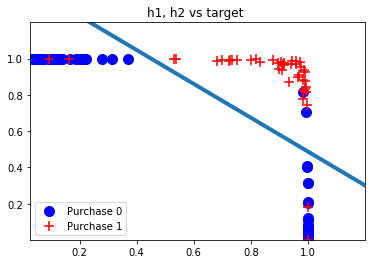

In [12]:

import statsmodels.formula.api as sm

model_combined = sm.logit(formula='Purchase ~ inter1+inter2', data=Emp_Purchase_raw)
fitted_combined = model_combined.fit(method="bfgs")
fitted_combined.summary()

# getting slope and intercept of the line
slope_combined=fitted_combined.params[1]/(-fitted_combined.params[2])
intercept_combined=fitted_combined.params[0]/(-fitted_combined.params[2])

#Finally draw the decision boundary for this logistic regression model
import matplotlib.pyplot as plt

fig = plt.figure()
ax2 = fig.add_subplot(111)

ax2.scatter(Emp_Purchase_raw.inter1[Emp_Purchase_raw.Purchase==0],Emp_Purchase_raw.inter2[Emp_Purchase_raw.Purchase==0], s=100, c='b', marker="o", label='Purchase 0')
ax2.scatter(Emp_Purchase_raw.inter1[Emp_Purchase_raw.Purchase==1],Emp_Purchase_raw.inter2[Emp_Purchase_raw.Purchase==1], s=100, c='r', marker="+", label='Purchase 1')

plt.xlim(min(Emp_Purchase_raw.inter1), max(Emp_Purchase_raw.inter1)+0.2)
plt.ylim(min(Emp_Purchase_raw.inter2), max(Emp_Purchase_raw.inter2)+0.2)

plt.legend(loc='lower left')
plt.title('h1, h2 vs target ')

x_min, x_max = ax2.get_xlim()
y_min,y_max=ax2.get_ylim()
ax2.plot([x_min, x_max], [x_min*slope_combined+intercept_combined, x_max*slope_combined+intercept_combined],linewidth=4)
plt.show()

In [13]:
#######Accuracy and error of the model1
#Create the confusion matrix
#Predciting Values
predicted_values=fitted_combined.predict(Emp_Purchase_raw[["inter1"]+["inter2"]])
predicted_values[1:10]

#Lets convert them to classes using a threshold
threshold=0.5
threshold

import numpy as np
predicted_class=np.zeros(predicted_values.shape)
predicted_class[predicted_values>threshold]=1

#ConfusionMatrix
from sklearn.metrics import confusion_matrix as cm
ConfusionMatrix = cm(Emp_Purchase_raw[['Purchase']],predicted_class)
print(ConfusionMatrix)
accuracy=(ConfusionMatrix[0,0]+ConfusionMatrix[1,1])/sum(sum(ConfusionMatrix))
print(accuracy)

[[74  2]
 [ 4 39]]
0.9495798319327731


## The two decison boundries

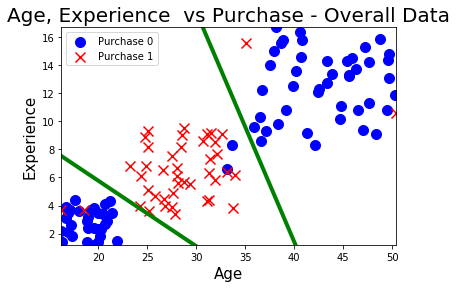

In [14]:
slope1=fitted1.params[1]/(-fitted1.params[2])
intercept1=fitted1.params[0]/(-fitted1.params[2])

slope2=fitted2.params[1]/(-fitted2.params[2])
intercept2=fitted2.params[0]/(-fitted2.params[2])

fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Age, Experience  vs Purchase - Overall Data', fontsize=20)


ax1.scatter(Emp_Purchase_raw.Age[Emp_Purchase_raw.Purchase==0],Emp_Purchase_raw.Experience[Emp_Purchase_raw.Purchase==0], s=100, c='b', marker="o", label='Purchase 0')
ax1.scatter(Emp_Purchase_raw.Age[Emp_Purchase_raw.Purchase==1],Emp_Purchase_raw.Experience[Emp_Purchase_raw.Purchase==1], s=100, c='r', marker="x", label='Purchase 1')
ax1.set_xlabel('Age',fontsize=15)
ax1.set_ylabel('Experience',fontsize=15)

plt.xlim(min(Emp_Purchase_raw.Age), max(Emp_Purchase_raw.Age))
plt.ylim(min(Emp_Purchase_raw.Experience), max(Emp_Purchase_raw.Experience))

x_min, x_max = ax1.get_xlim()
ax1.plot([0, x_max], [intercept1, x_max*slope1+intercept1],linewidth=4,c='g')
ax1.plot([0, x_max], [intercept2, x_max*slope2+intercept2],linewidth=4, c='g')

plt.legend(loc='upper left')
plt.show()

# Building the neural network in Py 

In [15]:
#pip install neurolab - install this by removing comment

In [19]:
import neurolab as nl

error = []

#Create network with 1 layer and random initialized
age_min = Emp_Purchase_raw["Age"].min()
age_max = Emp_Purchase_raw["Age"].max()

exp_min = Emp_Purchase_raw["Experience"].min()
exp_max = Emp_Purchase_raw["Experience"].max()

net = nl.net.newff(minmax = [[age_min,age_max],[exp_min,exp_max]], size = [2,1], transf = [nl.trans.LogSig()]*2)
net.trainf = nl.train.train_rprop
net.train(Emp_Purchase_raw[["Age"]+['Experience']],Emp_Purchase_raw[["Purchase"]],show = 0,epochs = 500)

'''


'''
i=0
print("Input to hidden layer weights")
print(net.layers[i].np['w'])
print(net.layers[i].np['b'])

i=1
print("hidden to ouput layer weights")
print(net.layers[i].np['w'])
print(net.layers[i].np['b'])





Input to hidden layer weights
[[-0.19028334 -0.52407144]
 [-0.06876443 -0.13600262]]
[4.49908542 2.3560403 ]
hidden to ouput layer weights
[[-88.22237845  33.21995785]]
[-7.49804007]


In [20]:
#ANN Result
predicted_values = net.sim(Emp_Purchase_raw[["Age"]+["Experience"]])

predicted_class = predicted_values
predicted_class[predicted_values>0.5] = 1
predicted_class[predicted_values<=0.5] = 0

#Predicted class
predicted_class[0:10]

#Confusion matrix
from sklearn.metrics import confusion_matrix as cm
ConfusionMatrix = cm(Emp_Purchase_raw[['Purchase']], predicted_class)
print(ConfusionMatrix)

#Accuracy
accuracy = (ConfusionMatrix[0,0]+ConfusionMatrix[1,1])/sum(sum(ConfusionMatrix))
print("Accuracy", accuracy)


[[74  2]
 [ 4 39]]
Accuracy 0.9495798319327731


# Digit Recognition Example

Shape of the Image  (3560, 5360, 3)


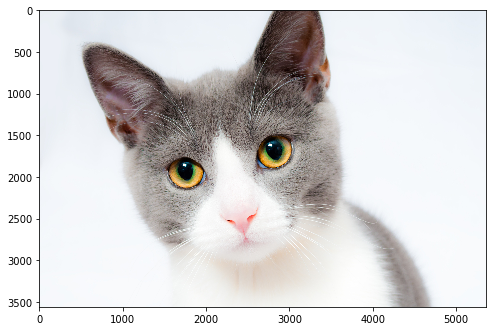

In [28]:
#Image importing
import matplotlib.pyplot as plt

#read cat image

x=plt.imread(r'cat.jpeg')

plt.imshow(x)

print("Shape of the Image ", x.shape)



In [29]:
print(x)

[[[228 233 239]
  [228 233 239]
  [228 233 239]
  ...
  [231 238 246]
  [231 238 246]
  [231 238 246]]

 [[228 233 239]
  [228 233 239]
  [229 234 240]
  ...
  [231 238 246]
  [231 238 246]
  [231 238 246]]

 [[228 233 239]
  [229 234 240]
  [229 234 240]
  ...
  [231 238 246]
  [231 238 246]
  [231 238 246]]

 ...

 [[244 248 251]
  [244 248 251]
  [244 248 251]
  ...
  [246 250 253]
  [246 250 253]
  [246 250 253]]

 [[244 248 251]
  [244 248 251]
  [244 248 251]
  ...
  [245 249 252]
  [245 249 252]
  [245 249 252]]

 [[244 248 251]
  [244 248 251]
  [244 248 251]
  ...
  [245 249 252]
  [245 249 252]
  [245 249 252]]]


In [30]:
#Importing test and training data
import numpy as np
digits_train = np.loadtxt("zip.train.txt")
digits_test = np.loadtxt("zip.test.txt")

#digits_train is numpy array. we convert it into dataframe for better handling
train_data=pd.DataFrame(digits_train)
test_data=pd.DataFrame(digits_test)
print("train_data.shape", train_data.shape)
print(train_data.head())

train_data.shape (7291, 257)
   0    1    2    3      4      5      6      7      8      9    ...    247  \
0  6.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -0.631  0.862  ...  0.304   
1  5.0 -1.0 -1.0 -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853  ... -0.671   
2  4.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000  ... -1.000   
3  7.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.273  0.684  0.960  0.450  ... -0.318   
4  3.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.928 -0.204  0.751  0.466  ...  0.466   

     248    249    250    251    252    253    254    255  256  
0  0.823  1.000  0.482 -0.474 -0.991 -1.000 -1.000 -1.000 -1.0  
1 -0.671 -0.033  0.761  0.762  0.126 -0.095 -0.671 -0.828 -1.0  
2 -1.000 -1.000 -0.109  1.000 -0.179 -1.000 -1.000 -1.000 -1.0  
3  1.000  0.536 -0.987 -1.000 -1.000 -1.000 -1.000 -1.000 -1.0  
4  0.639  1.000  1.000  0.791  0.439 -0.199 -0.883 -1.000 -1.0  

[5 rows x 257 columns]


In [32]:
#To get labels of the images
train_data[0].value_counts()     

0.0    1194
1.0    1005
2.0     731
6.0     664
3.0     658
4.0     652
7.0     645
9.0     644
5.0     556
8.0     542
Name: 0, dtype: int64

Row num 5433


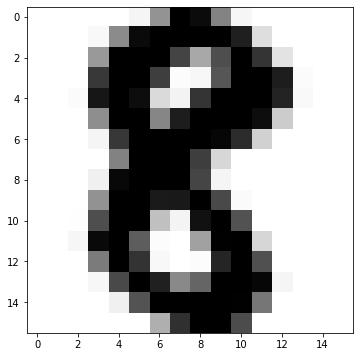

Row num 5533


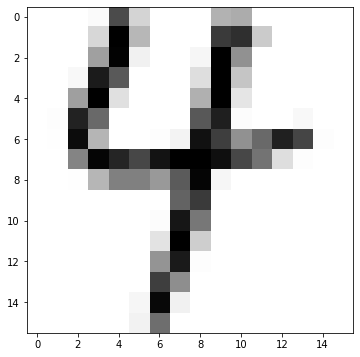

Row num 5633


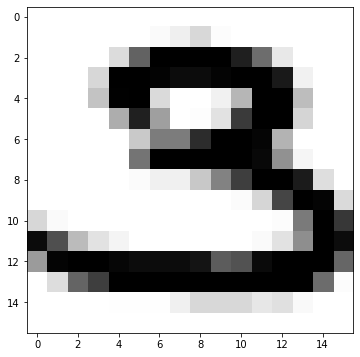

In [33]:
#Lets see some random images.
from random import randrange
i=randrange(7000)

print("Row num", i)
data_row=digits_train[i][1:]
pixels = np.matrix(data_row)
pixels=pixels.reshape(16,16)
plt.imshow(pixels,cmap='Greys')
plt.show()

print("Row num", i+100)
data_row=digits_train[i+100][1:]
pixels = np.matrix(data_row)
pixels=pixels.reshape(16,16)
plt.imshow(pixels,cmap='Greys')
plt.show()

print("Row num", i+200)
data_row=digits_train[i+200][1:]
pixels = np.matrix(data_row)
pixels=pixels.reshape(16,16)
plt.imshow(pixels,cmap='Greys')

## Data preparation

In [34]:
X_train=train_data.iloc[:,1:]
X_test=test_data.iloc[:,1:]
y_train=train_data.iloc[:,0]
y_test=test_data.iloc[:,0]
#Shape of the data
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (7291, 256)
y_train shape (7291,)
X_test shape (2007, 256)
y_test shape (2007,)


In [35]:
#Creating multiple binary columns for multiple outputs
#####We need these variables while building the model
digit_labels=pd.DataFrame()

#Convert target into onehot encoding
digit_labels = pd.get_dummies(y_train)

#see our newly created labels data
digit_labels.head(10)

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0


In [36]:
#getting minimum and maximum of each column of x_train into a list
min_max_all_cols=[[X_train[i][0:].min(), X_train[i][0:].max()] for i in range(1,X_train.shape[1]+1)]
print(len(min_max_all_cols))
print(min_max_all_cols)


256
[[-1.0, 0.638], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 0.752], [-1.0, 0.776], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 0.997], [-1.0, 0.938], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 0.937], [-1.0, 0.862], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 0.908], [-1.0, 0.901], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-

## Model Building

In [37]:
##Configure the network
net = nl.net.newff(minmax=min_max_all_cols,size=[20,10],transf=[nl.trans.LogSig()]*2)

#Training method is Resilient Backpropagation method
net.trainf = nl.train.train_rprop 

##Train the network
import time
start_time = time.time()
net.train(X_train, digit_labels, show=0, epochs=300)
print("--- %s seconds ---" % (time.time() - start_time))

/Users/ychinmka@in.ibm.com/opt/anaconda3/lib/python3.7/site-packages/neurolab/trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


--- 171.28655004501343 seconds ---


In [38]:
'''
#minmax	
This parameter takes a list of lists as input. 
We need to supply the minimum and maximum value of all the input variables. 
It helps the algorithm in weights initialization 

#Size 
Takes a list as input.
Mention nodes in each layer except the input layer
[Nodes in hidden layer1, Nodes in hidden layer2,…, Nodes in hidden layer k, Nodes in output layer]
[2,1] – One hidden layer with 2 nodes and an output layer with one node
[20,10] – One hidden layer with 20 nodes and an output layer with ten nodes

#Transf= nl.trans.LogSig()
‘Transf’ is the activation function parameter. LogSig() is the sigmoid function’s standard syntax. For regression output we can use “PureLin”
[nl.trans.LogSig()]*2	*2 denotes the two activations from input to hidden; hidden to output in this case.
If we have two hidden layers, then we need to mention*3

net.trainf = nl.train.train_rprop 
#Train algorithms based gradients algorithms - Resilient Backpropagation

'''

'\n#minmax\t\nThis parameter takes a list of lists as input. \nWe need to supply the minimum and maximum value of all the input variables. \nIt helps the algorithm in weights initialization \n\n#Size \nTakes a list as input.\nMention nodes in each layer except the input layer\n[Nodes in hidden layer1, Nodes in hidden layer2,…, Nodes in hidden layer k, Nodes in output layer]\n[2,1] – One hidden layer with 2 nodes and an output layer with one node\n[20,10] – One hidden layer with 20 nodes and an output layer with ten nodes\n\n#Transf= nl.trans.LogSig()\n‘Transf’ is the activation function parameter. LogSig() is the sigmoid function’s standard syntax. For regression output we can use “PureLin”\n[nl.trans.LogSig()]*2\t*2 denotes the two activations from input to hidden; hidden to output in this case.\nIf we have two hidden layers, then we need to mention*3\n\nnet.trainf = nl.train.train_rprop \n#Train algorithms based gradients algorithms - Resilient Backpropagation\n\n'

## Model Results

In [39]:
# Prediction on test data
predicted_values = net.sim(X_test)
predicted=pd.DataFrame(predicted_values)
#print(round(predicted.head(10),3))

#Converting predicted probabilities into numbers
predicted_number=predicted.idxmax(axis=1)
#print(predicted_number.head(15))

##Accuracy calculation on test data
#confusion matrix
ConfusionMatrix = cm(y_test,predicted_number)
print("ConfusionMatrix on test data \n", ConfusionMatrix)

#accuracy
accuracy=np.trace(ConfusionMatrix)/sum(sum(ConfusionMatrix))
print("Test Accuracy", accuracy)

ConfusionMatrix on test data 
 [[339   0   3   4   3   4   5   1   0   0]
 [  0 250   3   0   4   1   2   1   1   2]
 [  2   0 173   6   4   1   1   3   7   1]
 [  1   0   4 136   1  14   0   3   5   2]
 [  0   2   6   0 181   1   3   1   2   4]
 [  5   0   3   7   4 136   1   0   1   3]
 [  2   0   2   0   4   5 156   0   1   0]
 [  0   0   4   1   6   0   0 133   0   3]
 [  3   0   4   4   3   4   0   3 144   1]
 [  0   0   1   0   5   1   0   1   1 168]]
Test Accuracy 0.9048330842052815


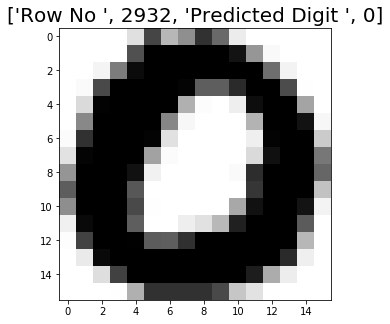

In [50]:
###Preictions on Random data

#i is a random number between 0 and 7291
i=randrange(7291)

random_sampel_data=digits_train[[i]]
random_sampel_data1=pd.DataFrame(random_sampel_data)
X_sample=random_sampel_data1.drop(random_sampel_data1.columns[[0]], axis=1)

predicted_values = net.sim(X_sample)
predicted=pd.DataFrame(predicted_values)
predicted_number=predicted.idxmax(axis=1)
predicted_number

data_row=random_sampel_data[0][1:]
pixels = np.matrix(data_row)
pixels=pixels.reshape(16,16)
plt.rcParams["figure.figsize"] = (7,5)
plt.title(["Row No ", i, "Predicted Digit ", predicted_number[0]], fontsize=20)
plt.imshow(pixels, cmap='Greys')